# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle

In [2]:
# data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# columns = [
#     "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
#     "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
#     "hours-per-week", "native-country", "income"
# ]

# data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
# data.sample(10)
data = pd.read_csv('clean_data_T1.csv')
data.sample(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_encode,sex_encode,usa_yes_no,workclass_Local-gov,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
14092,2.012651,-0.188998,1.143255,7.596647,-0.217328,40,1,1,1,False,...,False,False,False,False,False,False,False,False,False,True
10407,1.426056,0.192024,-0.416698,-0.231441,-0.217328,40,0,1,1,False,...,False,False,False,False,True,False,False,False,False,True
12218,0.546163,-0.828307,-0.416698,-0.231441,-0.217328,40,0,1,1,True,...,False,False,False,True,False,False,False,False,False,True
26800,-0.480378,3.065625,1.533244,-0.231441,-0.217328,10,0,1,1,False,...,False,True,False,False,False,False,False,False,False,True
289,0.839461,0.039083,-2.366641,-0.231441,-0.217328,40,0,1,0,False,...,False,False,False,False,False,False,False,False,False,True
9752,-1.506919,-0.115364,-0.416698,-0.231441,-0.217328,38,0,0,1,False,...,False,False,False,True,False,False,False,False,False,True
5157,-0.993648,0.273822,-2.756629,-0.231441,-0.217328,40,0,1,1,False,...,False,False,False,True,False,False,False,False,False,True
27207,-0.773675,0.191105,-2.756629,-0.231441,-0.217328,25,0,1,0,False,...,False,False,False,False,False,False,False,False,False,True
22483,0.106217,0.858857,1.143255,-0.231441,-0.217328,50,0,1,1,False,...,False,False,False,False,False,False,False,False,False,True
4668,-0.553702,-0.348731,-0.026710,-0.231441,-0.217328,40,0,1,1,False,...,False,False,False,False,False,False,False,False,False,True


In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Regression model

In [4]:
# Scaler for SGDRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
results = []
def train_evaluate(name, model, features_train, features_test):
    model.fit(features_train, y_train)
    preds = model.predict(features_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2})

In [6]:
# SGDRegressor
sgd = SGDRegressor(loss = 'huber', penalty = 'l2', alpha = 0.0001,
                   learning_rate = 'adaptive', eta0=0.01, max_iter=2000, random_state=42)
train_evaluate('SGD Regressor', sgd, X_train_scaled, X_test_scaled)

C:\Users\vitok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
sgd_curve = SGDRegressor(max_iter=1, tol=None, learning_rate='adaptive', eta0=0.01, random_state=42)
train_errors = []
val_errors = []
epochs = 50  # Numarul de epoci
for epoch in range(epochs):
    X_train_shuffled, y_train_shuffled = shuffle(X_train_scaled, y_train, random_state=epoch)
    # Antrenare pentru o epoca
    sgd_curve.partial_fit(X_train_shuffled, y_train_shuffled)
    # Predictii pe setul curent
    y_train_pred = sgd_curve.predict(X_train_scaled)
    y_val_pred = sgd_curve.predict(X_test_scaled)
    # Calculare RMSE si salvare
    train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_errors.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))

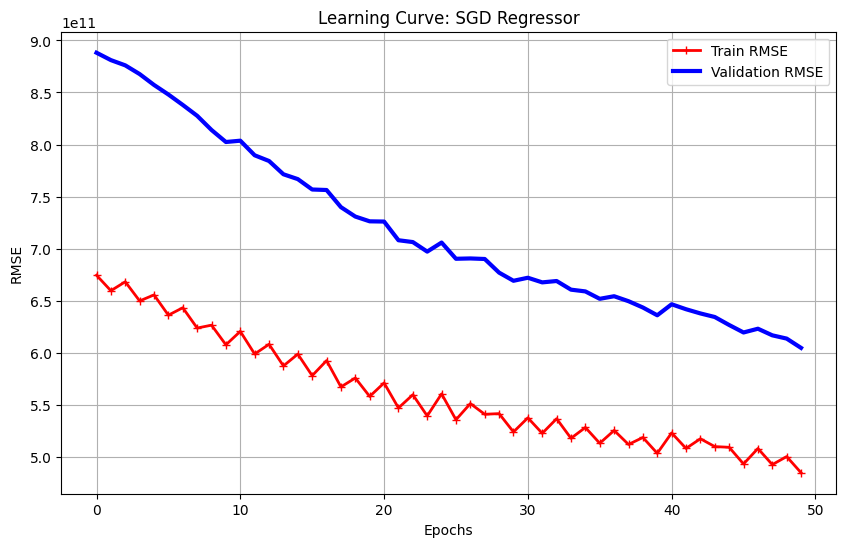

In [35]:
# Grafic 
plt.figure(figsize=(10, 6))
plt.plot(train_errors, "r-+", linewidth=2, label="Train RMSE")
plt.plot(val_errors, "b-", linewidth=3, label="Validation RMSE")
plt.title('Learning Curve: SGD Regressor')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

##### Graficul learning curve este dovada vizuala ca algoritmul SGD a reusit sa minimizeze eroarea treptat, ajungand la o solutie stabila, confirmand totodata ca modelul nu sufera de overfitting daca liniile de antrenare si validare converg si raman apropiate sau semnaland nevoia de ajustare a ratei de invatare daca traiectoria erorii este haotica.

In [7]:
# Linear Regression
train_evaluate('Linear Regression', LinearRegression(), X_train, X_test)

In [8]:
# Decision Tree Regressor
train_evaluate('Decision Tree', DecisionTreeRegressor(max_depth=8, random_state=42), X_train, X_test)

In [9]:
# Random Forest Regressor
train_evaluate('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42), X_train, X_test)

C:\Users\vitok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [10]:
# Ridge Regression
train_evaluate('Ridge Regression', Ridge(alpha=10), X_train_scaled, X_test_scaled)

In [11]:
# Lasso Regression
train_evaluate('Lasso Regression', Lasso(alpha=0.1), X_train_scaled, X_test_scaled)

In [12]:
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df)

               Model       RMSE       MAE  R2 Score
3      Random Forest  10.497218  7.097547  0.266862
2      Decision Tree  10.873004  7.392148  0.213432
4   Ridge Regression  10.963985  7.604646  0.200213
1  Linear Regression  10.963990  7.604979  0.200213
5   Lasso Regression  10.986207  7.548216  0.196968
0      SGD Regressor  11.730886  7.276482  0.084414


In [13]:
# Helper pentru a evalua modelele
results = []
def evaluate(exp_name, model_name, model, X_tr, X_te, y_tr, y_te):
   model.fit(X_tr, y_tr)
   preds = model.predict(X_te)
   rmse = np.sqrt(mean_squared_error(y_te, preds))
   results.append({'Experiment': exp_name, 'Model': model_name, 'RMSE': rmse})

X = data.drop(columns=['hours-per-week'])
y = data['hours-per-week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Am creat acest bloc pentru a automatiza si standardiza procesul de experimentare

In [14]:
# Baseline model
evaluate('Baseline', 'Linear Regression', LinearRegression(), X_train, X_test, y_train, y_test)
evaluate('Baseline', 'Random Forest', RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test)


# model simplu cu setari default 

In [15]:
# Renuntam la fnlwg
X_sel = X.drop(columns=['fnlwgt'])
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y, test_size=0.2, random_state=42)
evaluate('1. Drop fnlwgt', 'Linear Regression', LinearRegression(), X_train_sel, X_test_sel, y_train_sel, y_test_sel)

# eliminam pentru a reduce aglomerarea din date, mai ales ca aceasta coloana are o corelatie mica cu targetul, iar daca tot am scos, algoritmul ar trebui sa invete mai usor sau sa fie mai rapid

In [16]:
# Adaugam age^2
X_poly = X_sel.copy()
X_poly['age_squared'] = X_poly['age'] ** 2
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
evaluate('2. Add Age^2', 'Linear Regression', LinearRegression(), X_train_poly, X_test_poly, y_train_poly, y_test_poly)

# corectam o limitare a regresiei liniare, deoarece in viata reala, relatia dintre varsta si munca nu este strict liniara.

In [17]:
# Age * edu 
X_int = X_poly.copy()
X_int['age_x_edu'] = X_int['age'] * X_int['education-num']
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_int, y, test_size=0.2, random_state=42)
evaluate('3. Interaction', 'Linear Regression', LinearRegression(), X_train_int, X_test_int, y_train_int, y_test_int)

# feature de interactiune, testam ipoteza ca efectul unei variabile depinde de alta variabila


In [18]:
# Rezultate
print(pd.DataFrame(results).sort_values(by='RMSE'))

       Experiment              Model       RMSE
4  3. Interaction  Linear Regression  10.677590
3    2. Add Age^2  Linear Regression  10.679657
1        Baseline      Random Forest  10.834836
0        Baseline  Linear Regression  10.963990
2  1. Drop fnlwgt  Linear Regression  10.966843


##### Cel mai bun model a fost linear regression de la experimentul age * edu, unde rmse-ul a scazut de la 10.96 la 10.67. Asta arata ca educatia influenteaza orele de munca diferit in functie de varsta. 

In [21]:
best_model = LinearRegression()
best_model.fit(X_train_int, y_train_int) # Datele din Experimentul C
final_preds = best_model.predict(X_test_int)

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

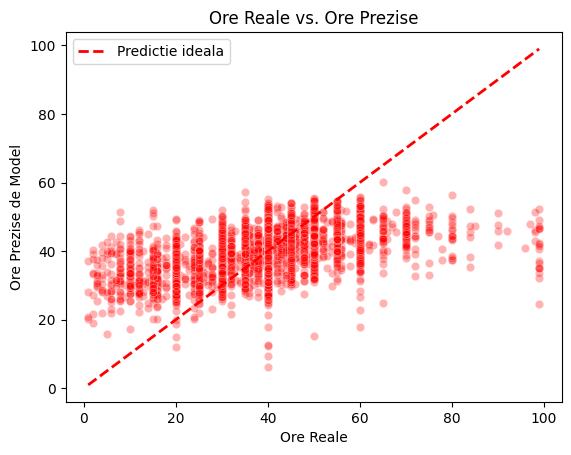

In [36]:
sns.scatterplot(x=y_test_int, y=final_preds, alpha=0.3, color='red')
min_val = min(y_test_int.min(), final_preds.min())
max_val = max(y_test_int.max(), final_preds.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Predictie ideala')
plt.title('Ore Reale vs. Ore Prezise')
plt.xlabel('Ore Reale')
plt.ylabel('Ore Prezise de Model')
plt.legend()
plt.show()

##### Graficul arata ca modelul prezice relativ bine pentru media angajatilor (40 ore), insa tinde sa subestimeze semnificativ valorile extreme (80-99), ceea ce sugereaza ca modelul liniar nu poate capta complet complexitatea cazurilor exceptionale.